# 9.2. Minimizing a mathematical function

In [1]:
import numpy as np
import scipy as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 1 - np.sin(x) / x

In [3]:
x = np.linspace(-20., 20., 1000)
y = f(x)

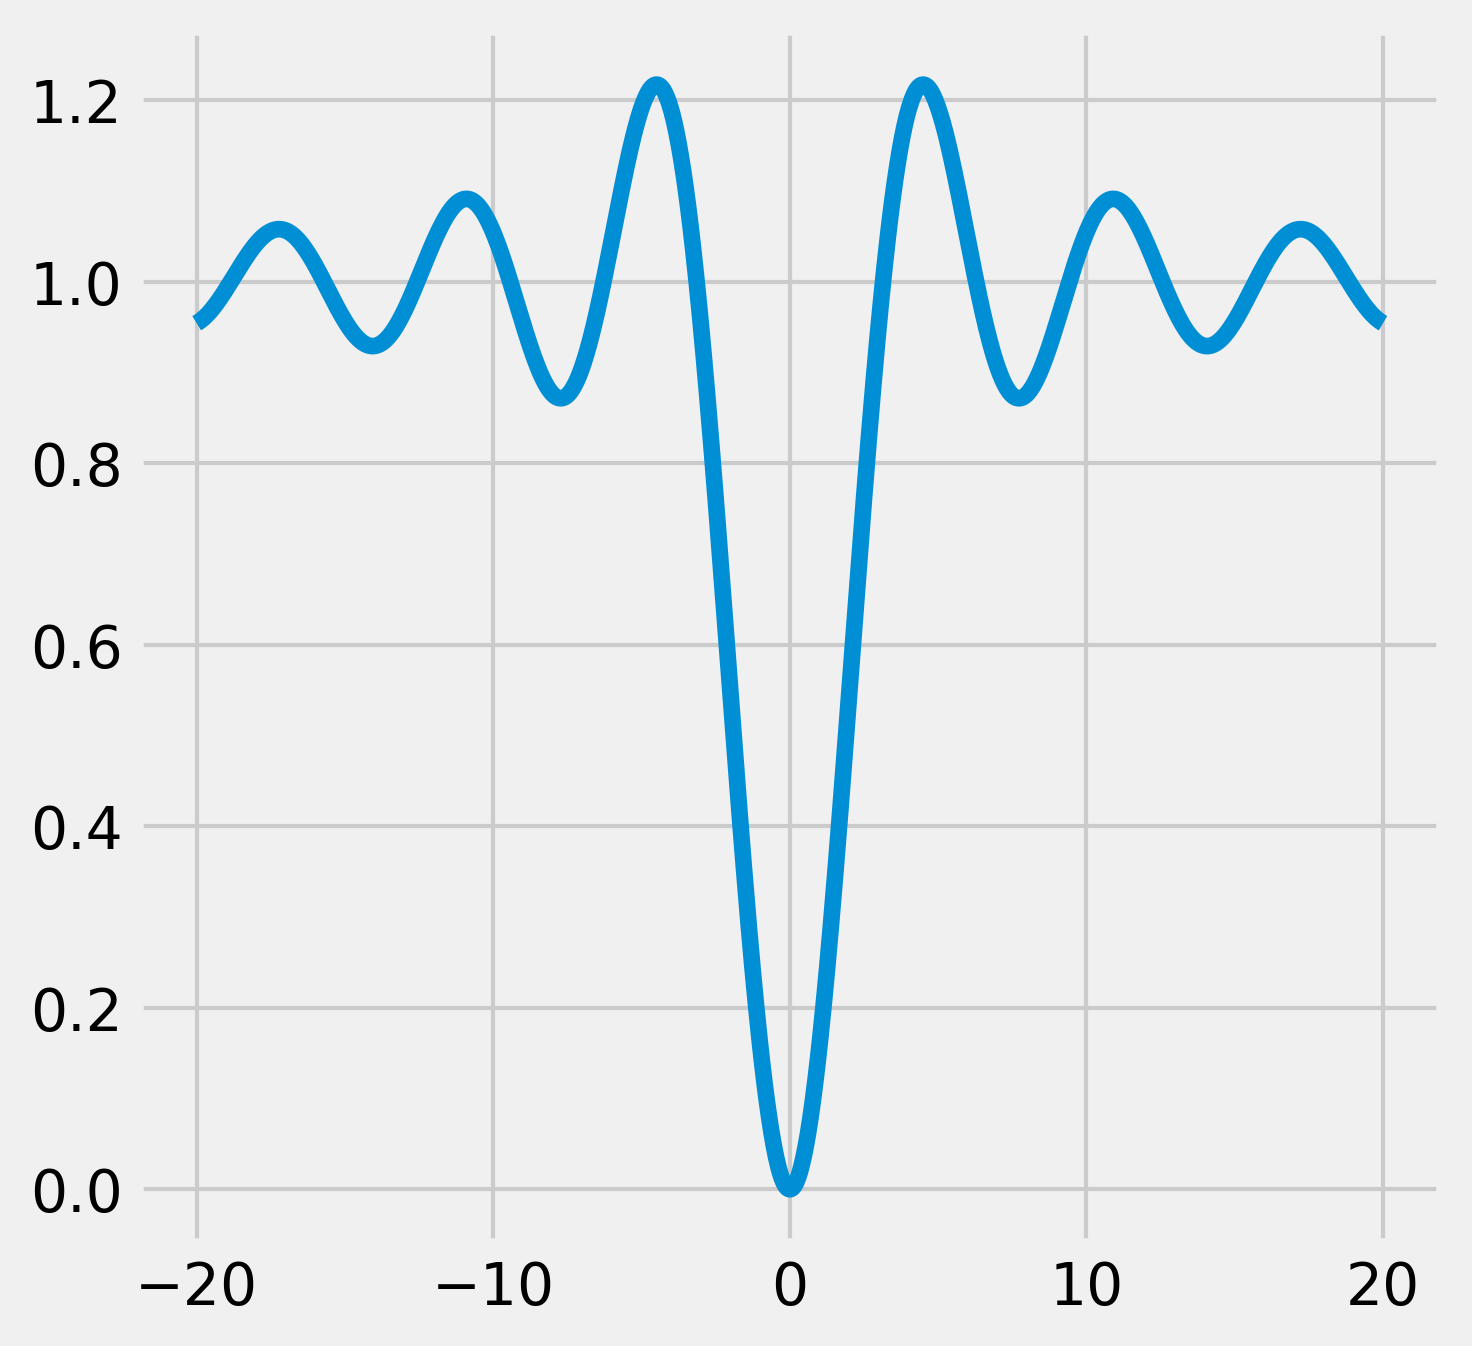

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)

In [5]:
x0 = 3
xmin = opt.minimize(f, x0).x

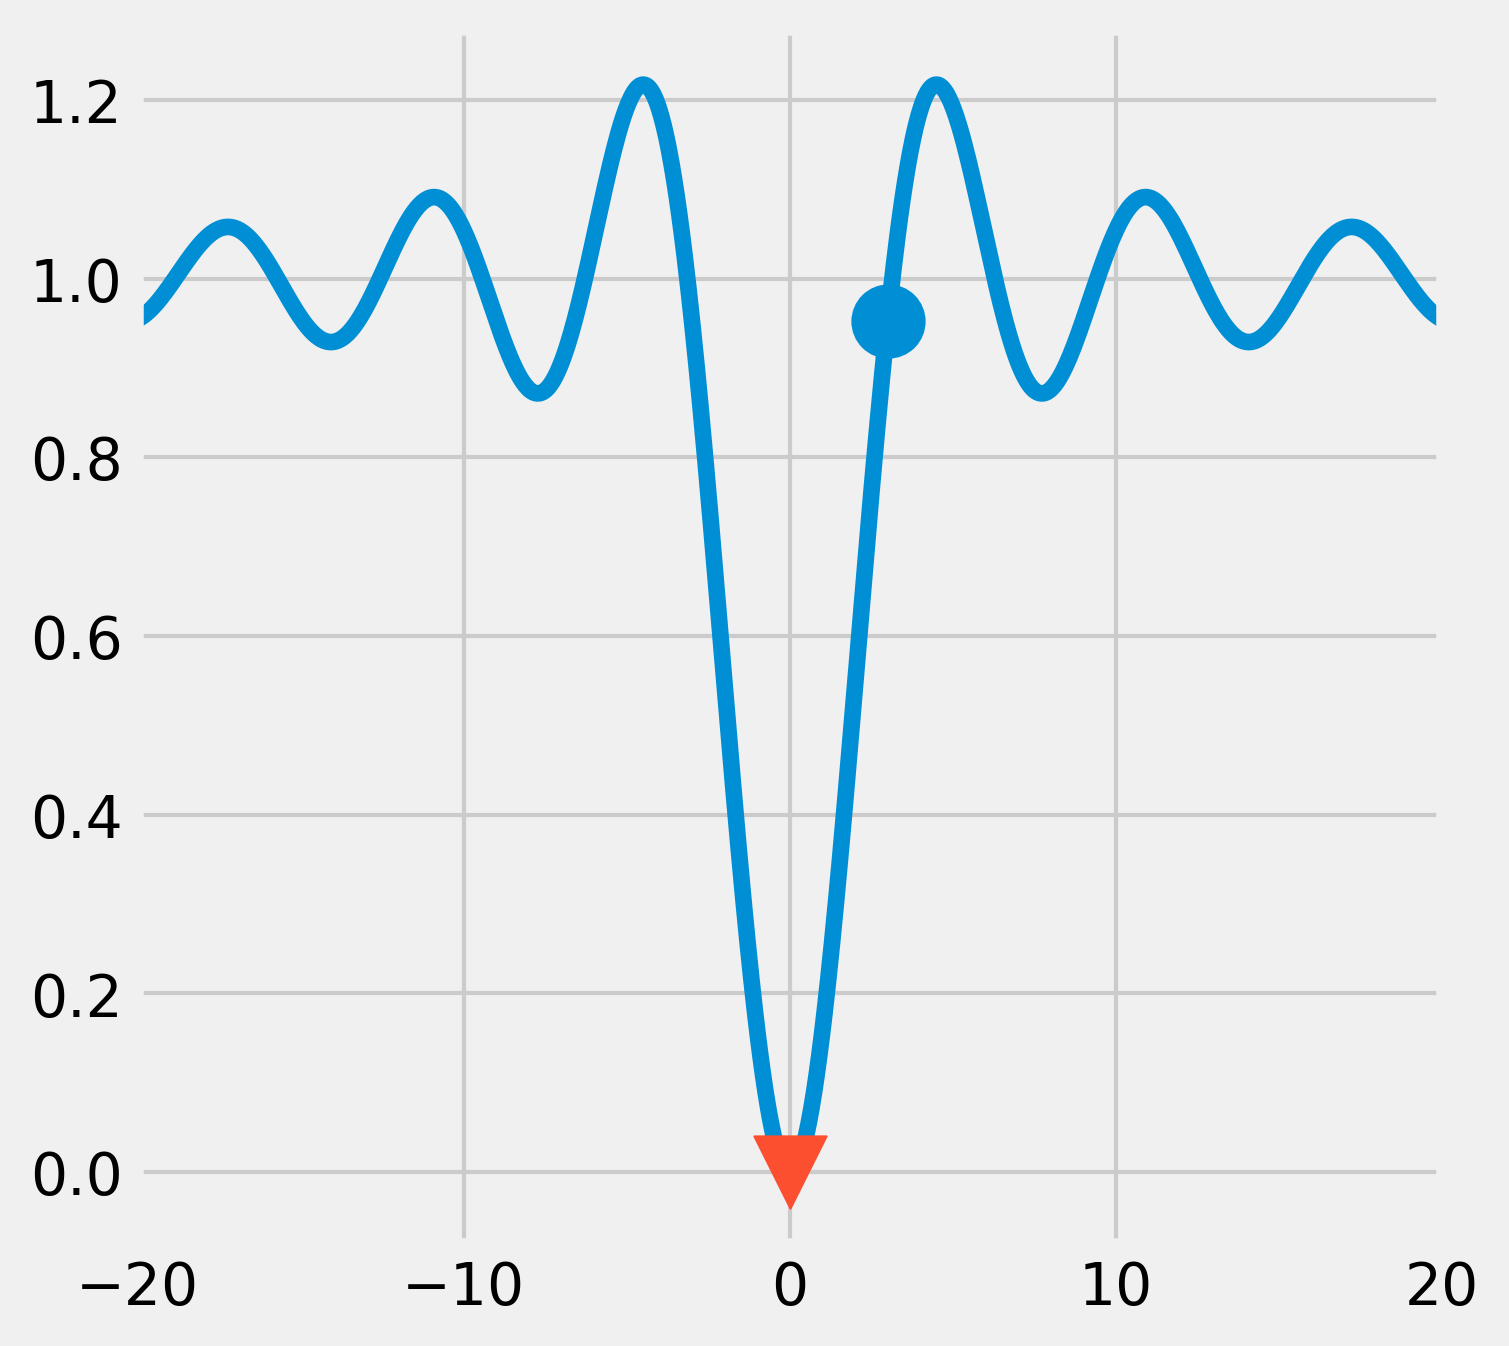

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=300)
ax.scatter(xmin, f(xmin), marker='v', s=300,
           zorder=20)
ax.set_xlim(-20, 20)

In [7]:
x0 = 10
xmin = opt.minimize(f, x0).x

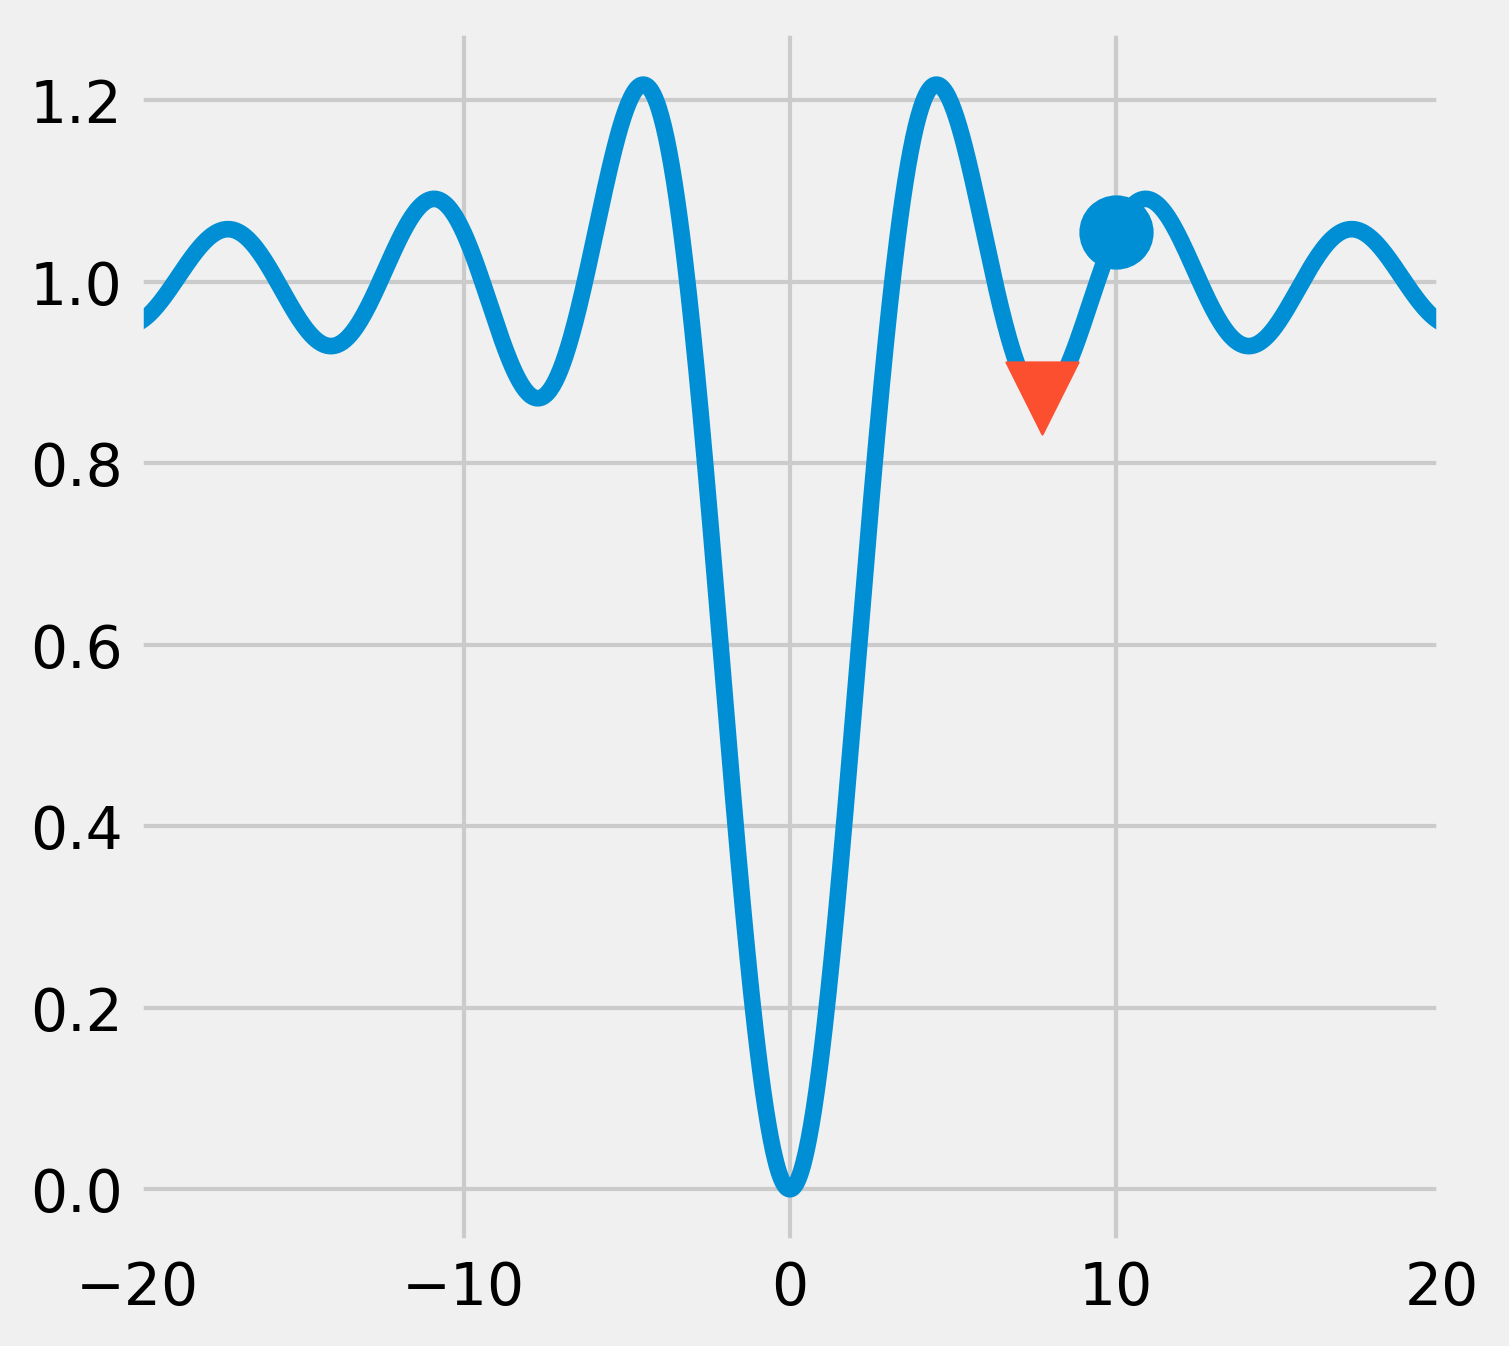

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=300)
ax.scatter(xmin, f(xmin), marker='v', s=300,
           zorder=20)
ax.set_xlim(-20, 20)

In [9]:
# We use 1000 iterations.
xmin = opt.basinhopping(f, x0, 1000).x

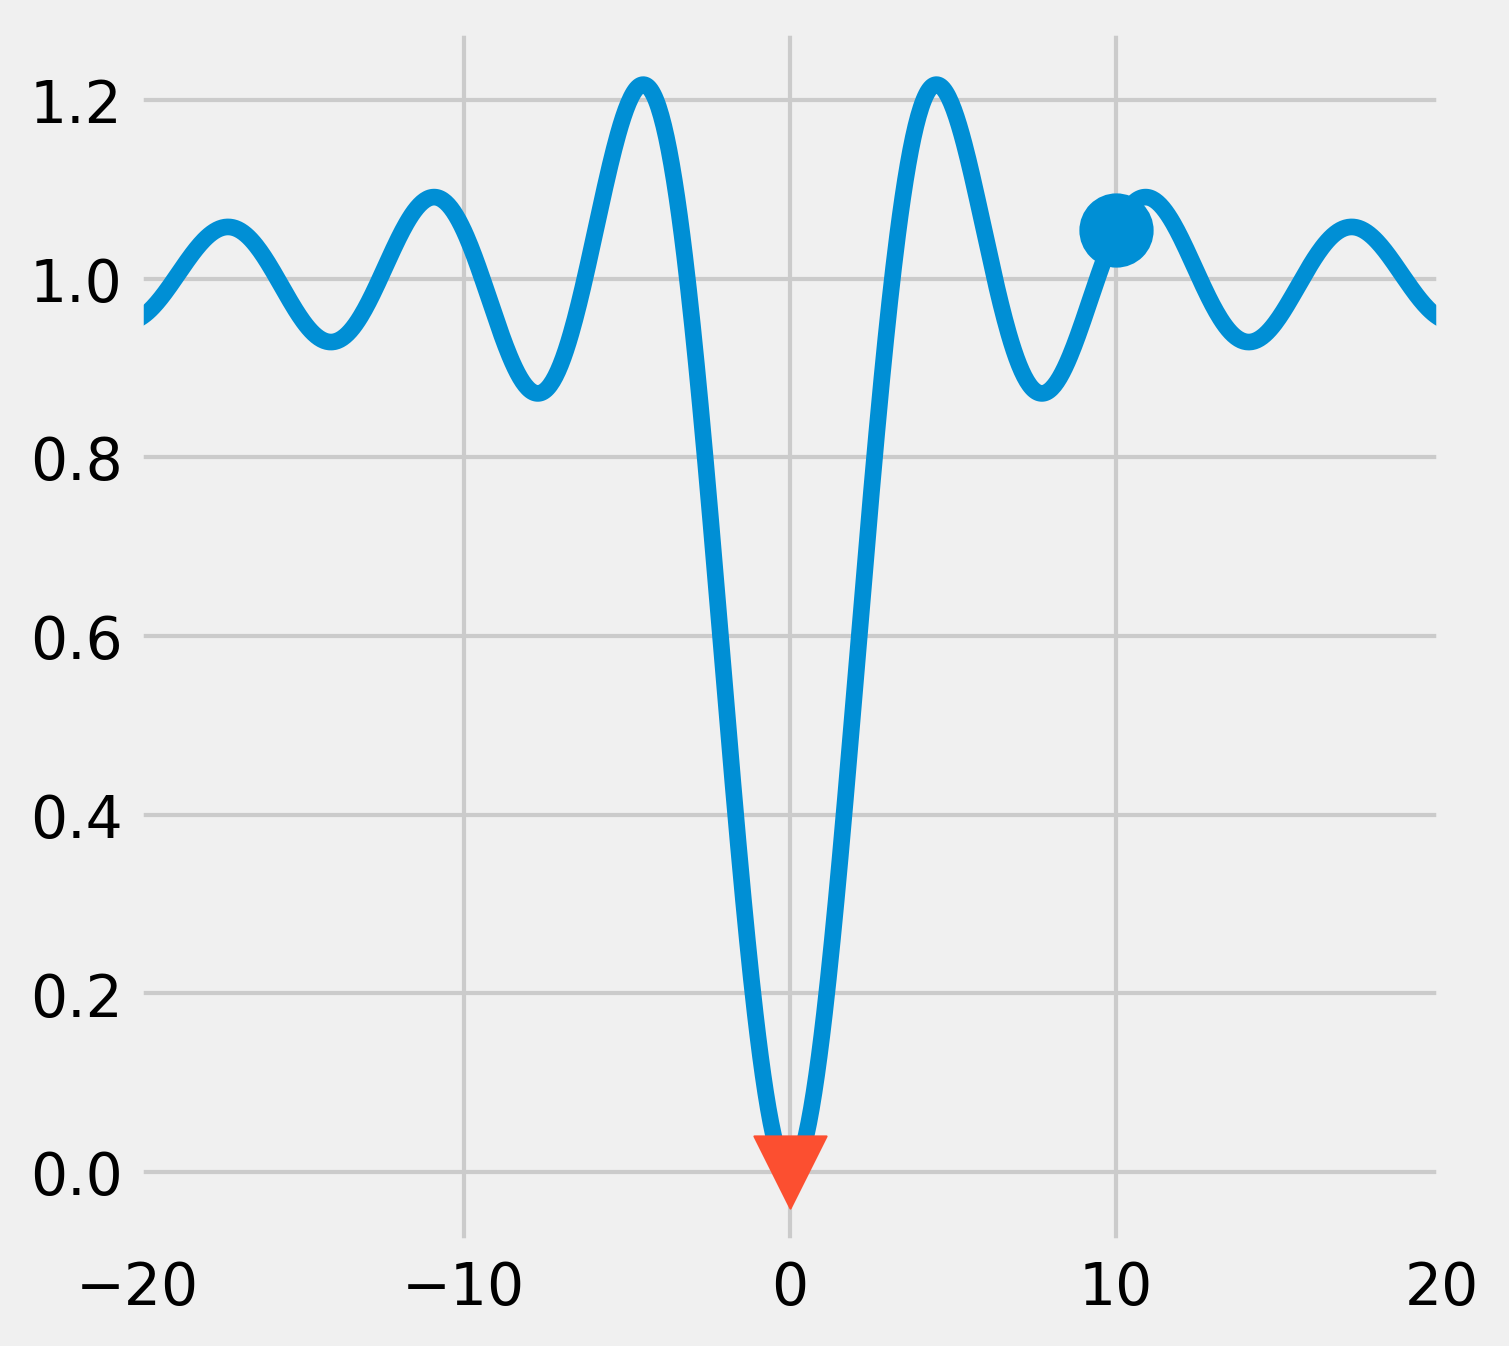

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=300)
ax.scatter(xmin, f(xmin), marker='v', s=300,
           zorder=20)
ax.set_xlim(-20, 20)

In [11]:
def g(X):
    # X is a 2*N matrix, each column contains
    # x and y coordinates.
    x, y = X
    return (np.sin(3*np.pi*x)**2 +
            (x-1)**2 * (1 + np.sin(3*np.pi*y)**2) +
            (y-1)**2 * (1 + np.sin(2*np.pi*y)**2))

In [12]:
n = 500
k = 10
X, Y = np.mgrid[-k:k:n * 1j,
                -k:k:n * 1j]

In [13]:
Z = g(np.vstack((X.ravel(), Y.ravel()))).reshape(n, n)

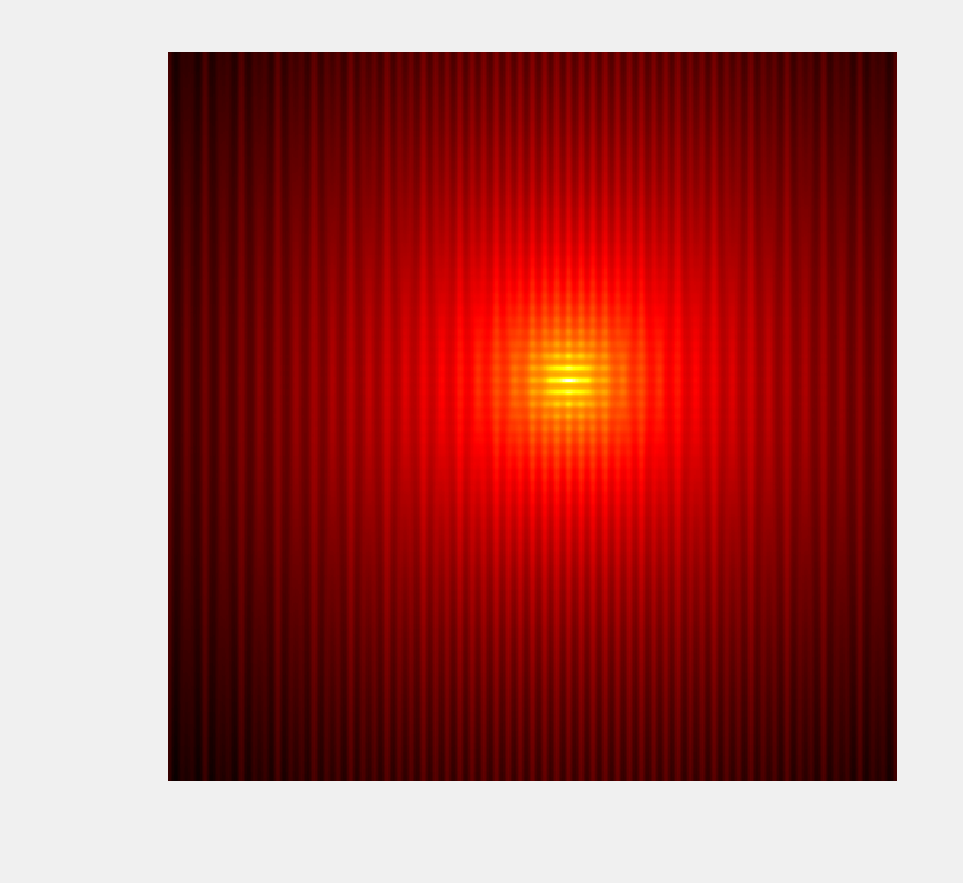

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
# We use a logarithmic scale for the color here.
ax.imshow(np.log(Z), cmap=plt.cm.hot_r,
          extent=(-k, k, -k, k), origin=0)
ax.set_axis_off()

In [15]:
# We use the Powell method.
x0, y0 = opt.minimize(g, (8, 3),
                      method='Powell').x
x0, y0

(1.000, 1.000)

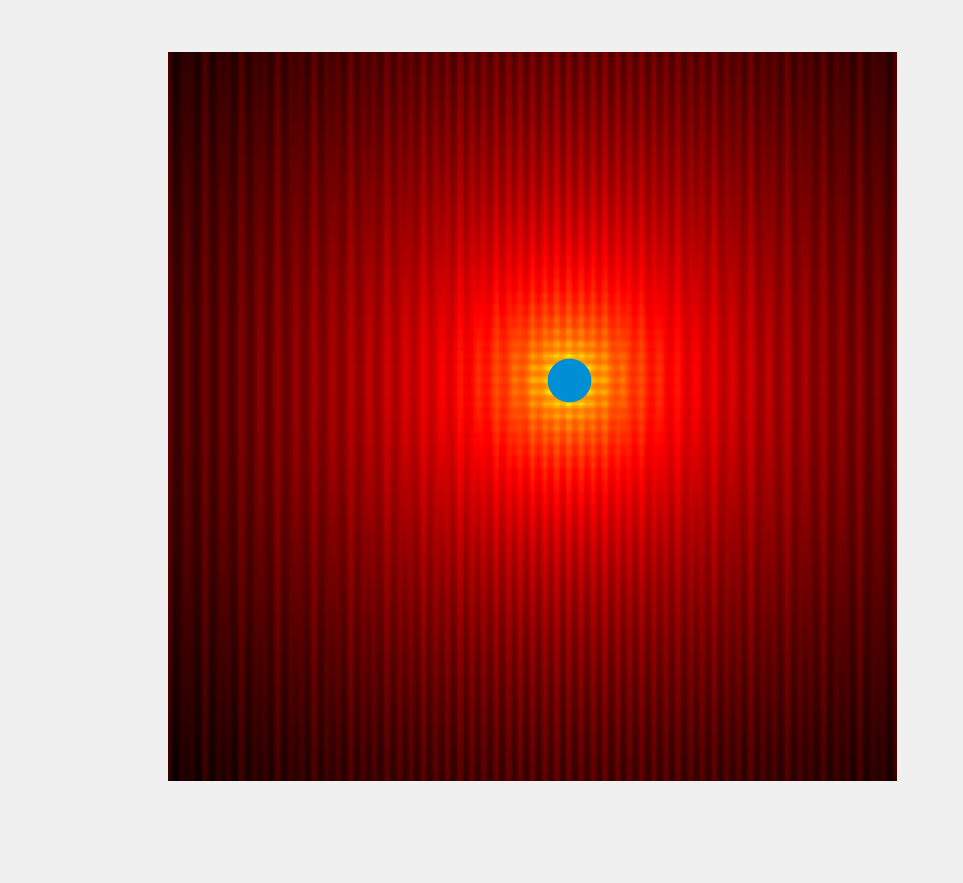

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.imshow(np.log(Z), cmap=plt.cm.hot_r,
          extent=(-k, k, -k, k), origin=0)
ax.scatter(x0, y0, s=100)
ax.set_axis_off()